# Práctico 23/04 #

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_validate

In [9]:
data = pd.read_csv("train.csv")
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data.label.value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

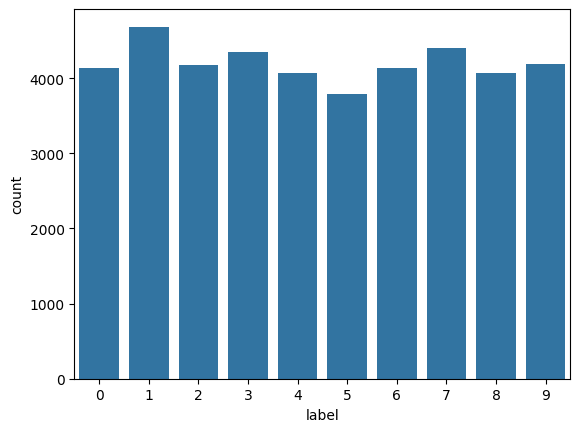

In [ ]:
sns.countplot(data, x = "label") #Visual

In [13]:
X = data.drop(columns=["label"]) # I get only pixel values
y = data.label
X.shape, y.shape

((42000, 784), (42000,))

In [16]:
X.iloc[0]

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 784, dtype: int64

In [15]:
X.iloc[0].values.shape

(784,)

In [18]:
X.iloc[0].values.reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,
          0,   0],
       [  

In [17]:
X.iloc[0].values.reshape(28,28).shape

(28, 28)

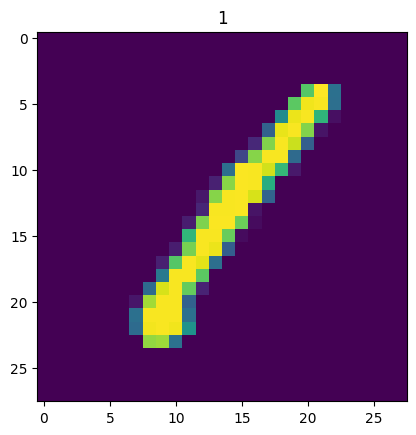

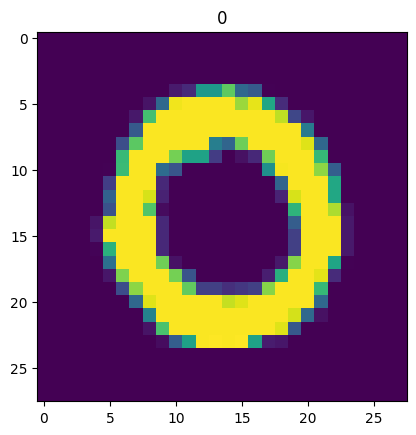

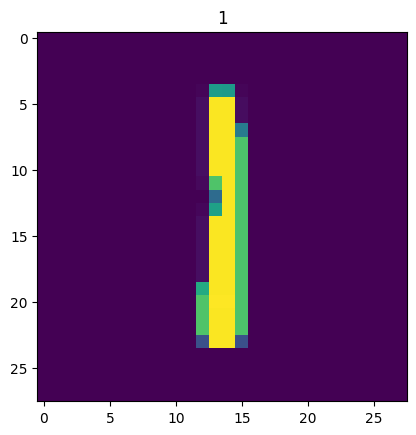

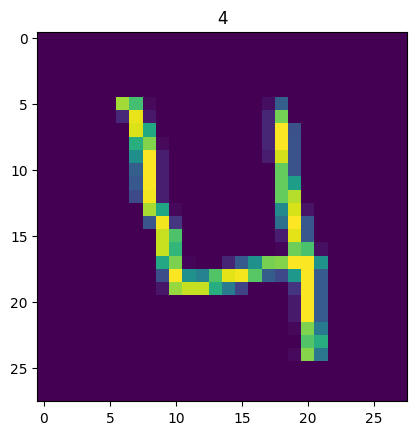

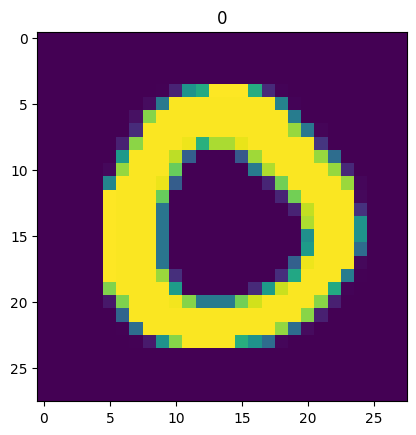

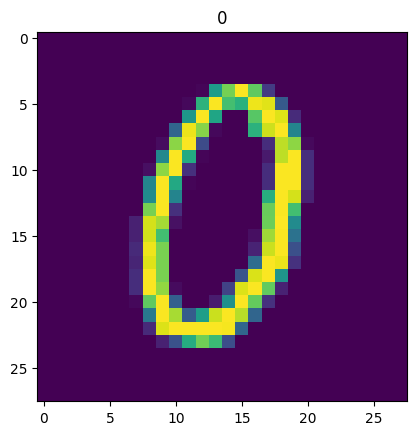

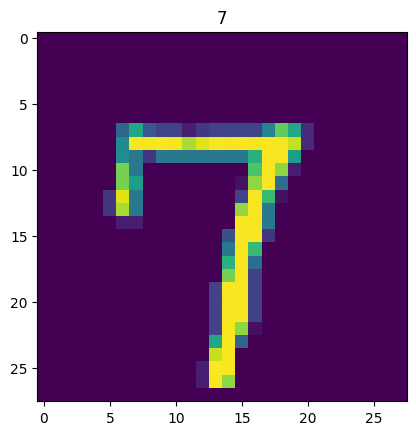

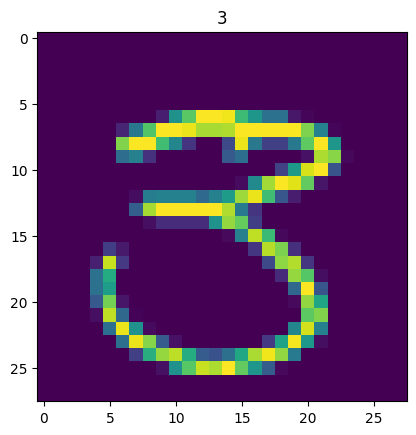

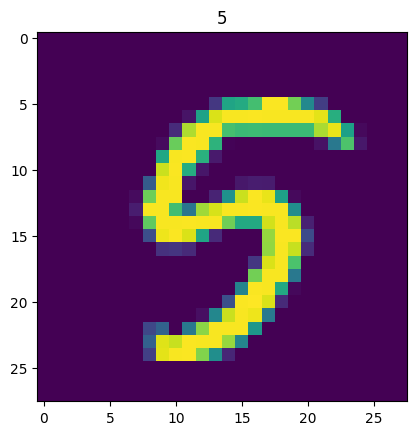

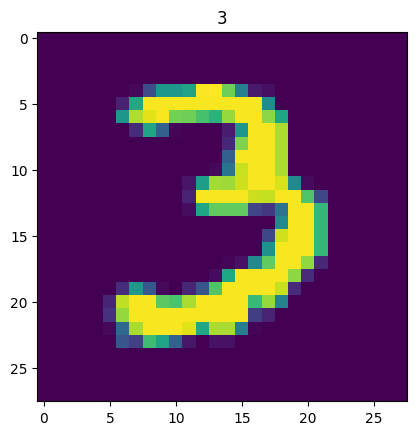

In [ ]:
for i in range(10):
    random_image = i # Select a random index
    sample_image = X.iloc[random_image].values.reshape(28,28) #Reshape a row
    plt.imshow(sample_image) #Show matrix
    plt.title(y.iloc[random_image]) #Show label as title
    plt.show() # Display

## Classification

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
mm = MinMaxScaler()
X = mm.fit_transform(X)


In [ ]:
%%time
# Traaining time
lr = LogisticRegression()
lr.fit(X,y)

CPU times: total: 23.7 s
Wall time: 14.9 s


c:\Users\diego\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Decomposition PCA

In [36]:
pca = PCA(200)
X_transformed = pca.fit_transform(X)
X_transformed.shape

(42000, 200)

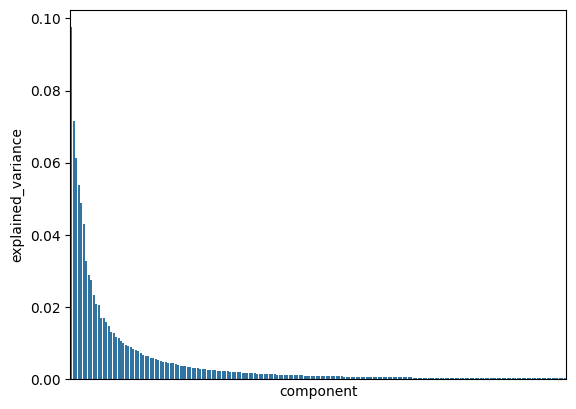

In [40]:
exp_variance = pd.DataFrame(pca.explained_variance_ratio_)
exp_variance["component"] = exp_variance.index + 1
exp_variance = exp_variance.rename(columns={0: "explained_variance"})
sns.barplot(exp_variance, x="component", y = "explained_variance")
plt.xticks([])
plt.show()

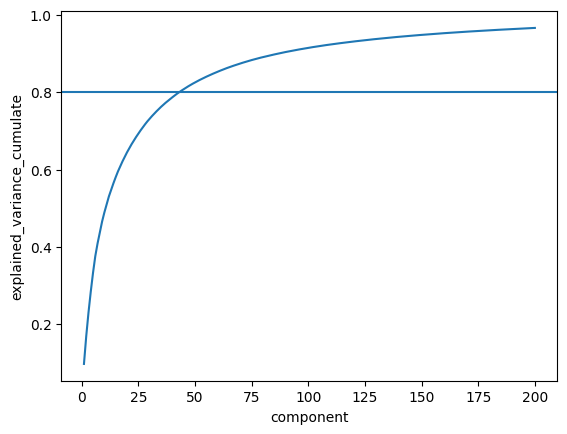

In [43]:
exp_variance["explained_variance_cumulate"] = exp_variance["explained_variance"].cumsum()
sns.lineplot(exp_variance, x = "component", y = "explained_variance_cumulate")
plt.axhline(0.8)
plt.show()

In [44]:
exp_variance_sample = exp_variance[exp_variance.explained_variance_cumulate <= 0.8]
num_components = exp_variance_sample.shape[0]
num_components

42

In [45]:
pca = PCA(num_components)
X_transformed = pca.fit_transform(X)
X_transformed.shape

(42000, 42)

In [ ]:
%%time
# Logistic regression using 42 components
lr = LogisticRegression()
lr.fit(X_transformed, y)
lr.score(X_transformed, y)

CPU times: total: 1.31 s
Wall time: 1.85 s


0.9056904761904762

## Visualize Components

<Axes: xlabel='0', ylabel='1'>

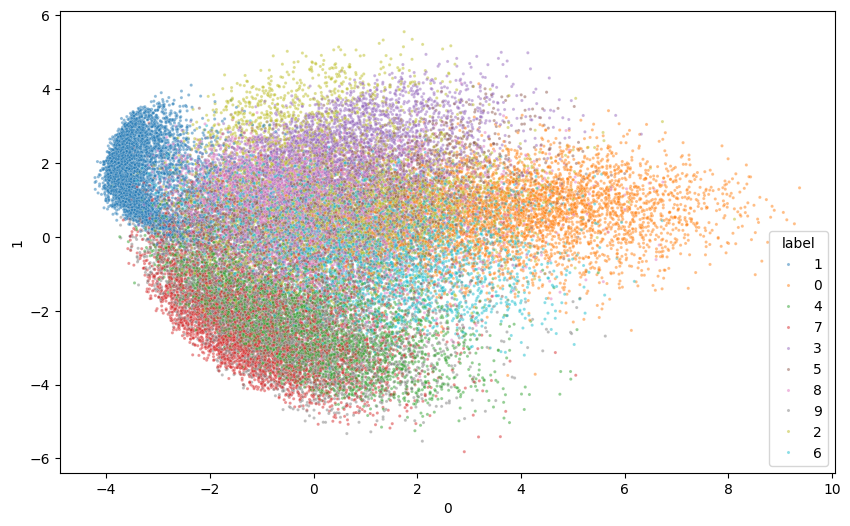

In [52]:
X_transformed = pd.DataFrame(X_transformed)
plt.figure(figsize=(10,6))
sns.scatterplot(X_transformed, x=0,y=1, hue = y.astype(str), alpha=0.5, s=5)

## Loadings

In [54]:
loadings = pd.DataFrame(pca.components_)
loadings

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.000058,-0.000012,-0.000005,-0.000002,-0.000002,3.323406e-07,-0.0,-0.0,-0.0,-0.0
1,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.000552,-0.000280,-0.000135,-0.000037,-0.000023,-1.307528e-05,-0.0,-0.0,-0.0,-0.0
2,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,0.000531,0.000285,0.000128,0.000037,0.000019,1.199427e-05,-0.0,-0.0,-0.0,-0.0
3,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.000254,-0.000158,-0.000095,-0.000044,-0.000051,-3.761123e-05,-0.0,-0.0,-0.0,-0.0
4,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.000582,-0.000307,-0.000169,-0.000067,-0.000094,-7.646523e-05,-0.0,-0.0,-0.0,-0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000050,0.000022,-0.000018,-0.000021,-0.000030,-2.295936e-05,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000225,-0.000119,-0.000043,-0.000021,-0.000025,-2.192038e-05,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001144,0.000565,0.000239,0.000059,0.000032,1.464210e-05,0.0,0.0,0.0,0.0
8,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,0.000782,0.000508,0.000271,0.000109,0.000051,3.427954e-05,-0.0,-0.0,-0.0,-0.0
9,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,0.000127,-0.000078,-0.000038,-0.000037,-0.000030,-2.480254e-05,-0.0,-0.0,-0.0,-0.0


In [55]:
loadings = pd.DataFrame(pca.components_)
loadings.shape

(42, 784)

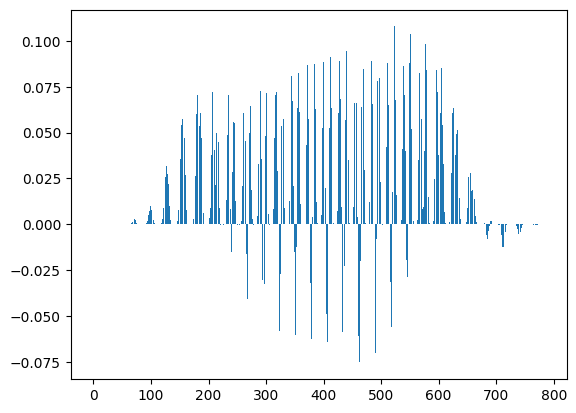

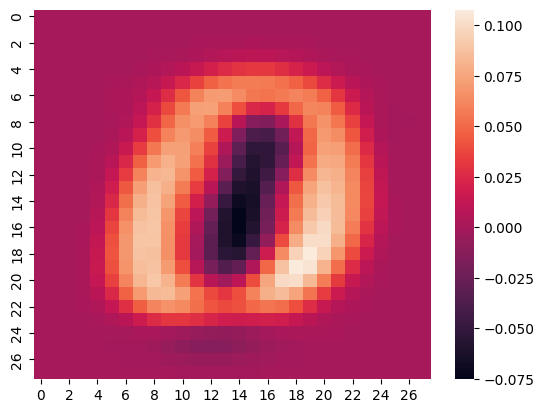

In [58]:
loadings = pd.DataFrame(pca.components_)
plt.bar(height = loadings.iloc[0], x = loadings.iloc[0].index)
plt.show()
first_component = loadings.iloc[0].values.reshape(28,28)
sns.heatmap(first_component)
plt.show()